
# Introduction

---
Up to this point, we’ve covered the foundational concepts of machine learning. You may have already experimented with various hyperparameters to optimize model performance. In this notebook, you’ll be introduced to several advanced techniques designed to further enhance your models.


This notebook consists the following parts:

- [A: Data retrieval ](#01)
- [B: Feature engineering](#02)
- [C: Model evaluation](#03)
- [D: Ensemble learning](#04)
- [E: Pipelines](#05)
- [F: Bring it all together](#06)
- [G: Bonus: ML OPS](#07)


---

### Learning Objectives
By the end of this two weeks you will be able to:
- Understand the fundamental concepts of ensemble learning.
- Use evaluation techniques to assess models performance.
- Enhance model performance by feature engineering. 
- Build pipelines for model development and preprocessing

---

### Instructions
- Ensure you fully understand the requirements and objectives of the assignment.
- Review the notebooks refered in the tasks
- If you need additional context or clarification, please check the provided videos or background literature.
- Work through each part of the assignment methodically, ensuring all tasks are completed.
- Update your repository with your new created work

### Additional Notes:
- Do not add datafiles to your repository. Repositories with datafiles will not be accepted
- Class solutions should be delivered in python files. Not in notebooks
- When AI tools are used, you must provide proper references and explanations for how they were utilized. Failure to do so will be considered as academic fraud
- The bonus assignment are not mandatory
- Use PEP8 

Good luck!

F.Feenstra

---


<a name='01'></a>
## Part A. Data retrieval

The dataset you can use for this notebook is the lung dataset from Maastricht University. It comprises 89 non-small cell lung cancer (NSCLC) patients records who underwent surgical treatment. The study where the data is from explored the relationship between radiomic imaging features and gene expression profiles. The samples were collected through biopsies at MAASTRO Clinic in The Netherlands, and the dataset is publicly available.

The authors of the related paper discovered that a prognostic radiomic signature, which captures intra-tumor heterogeneity, is closely associated with underlying gene expression patterns. Developing a machine learning model to predict histology from the Clinical and Genetic Lung data can improve diagnostic accuracy and treatment personalization. In this notebook we will develop such a prediction model. 

**Availabel Datasets**:
- Lung metadata dataset [1]
- Gene expression dataset [2]

**Important**
<span style="background-color: lightgreen;color: black">It is also allowed to use your own dataset from your own project if this data is highly dimensional and contains genetic information.</span>

[1] [NSCLC-Radiomics-Genomics](https://wiki.cancerimagingarchive.net/display/Public/NSCLC-Radiomics-Genomics#16056856db10d39adf704eefa53e41edcf5ef41c)

[2] [Gene Expression Data - GSE58661](https://ftp.ncbi.nlm.nih.gov/geo/series/GSE58nnn/GSE58661/matrix/)

[3] Aerts HJWL, Rios Velazquez E, Leijenaar RTH, Parmar C, Grossmann P, Carvalho S, Bussink J, Monshouwer R, Haibe-Kains B, Rietveld D, Hoebers F, Rietbergen MM, Leemans CR, Dekker A, Quackenbush J, Gillies RJ, & Lambin P. (2015). Data From NSCLC-Radiomics-Genomics. The Cancer Imaging Archive. https://doi.org/10.7937/K9/TCIA.2015.L4FRET6Z


### <span style="background-color: lightyellow;">Data retrieval task</span>
- Retrieve the data. (No cleaning needed yet)

In [1]:
import numpy as np 
import pandas as pd

### Load dataset, there are two dataset, one is a clinic data, one is a gene expression data, and they need a bridge to link them

In [2]:
lung = pd.read_excel("Lung3.metadata.xls")
lung.head(3)

,sample.name,title,CEL.file,source.location,organism,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,characteristics.tag.stage.nodes,characteristics.tag.stage.mets,characteristics.tag.primaryVSmets,characteristics.tag.grade,molecule tested,label,platform
0,LUNG3-01,lung_1,LUNG3-01.CEL,Left Lower Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, NOS",4.0,pT2,pN0,pM0,Primary,3,total RNA,biotin,GPL15048
1,LUNG3-02,lung_2,LUNG3-02.CEL,Left Lower Lobe,Homo sapiens,M,"Adenocarcinoma, Papillary, NOS",1.3,pT1,pNX,pMX,Primary,Not Available,total RNA,biotin,GPL15048
2,LUNG3-03,lung_3,LUNG3-03.CEL,Left Lower Lobe,Homo sapiens,M,Non-Small Cell,11.0,pT3,pN0,pM0,Primary,3,total RNA,biotin,GPL15048


### here is a bridge

In [3]:
# get the sample name with titles
with open('GSE58661_series_matrix.txt', 'r') as file:
    lines = file.readlines()
data_line1 = lines[29].strip().split('\t')
data_line2 = lines[30].strip().split('\t')
data_line_names = lines[62].strip().split('\t')
df = pd.DataFrame({'title':data_line1[1:], 'sample':data_line2[1:]})
df.head(3)

,title,sample
0,"""lung_1""","""GSM1416528"""
1,"""lung_2""","""GSM1416529"""
2,"""lung_3""","""GSM1416530"""


In [4]:
df['title'] = df['title'].apply(lambda x:  x.replace('"',''))
df['sample'] = df['sample'].apply(lambda x:  x.replace('"',''))
df_lung = df.merge(lung,how='inner',on='title')
df_lung.head(3)

,title,sample,sample.name,CEL.file,source.location,organism,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,characteristics.tag.stage.nodes,characteristics.tag.stage.mets,characteristics.tag.primaryVSmets,characteristics.tag.grade,molecule tested,label,platform
0,lung_1,GSM1416528,LUNG3-01,LUNG3-01.CEL,Left Lower Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, NOS",4.0,pT2,pN0,pM0,Primary,3,total RNA,biotin,GPL15048
1,lung_2,GSM1416529,LUNG3-02,LUNG3-02.CEL,Left Lower Lobe,Homo sapiens,M,"Adenocarcinoma, Papillary, NOS",1.3,pT1,pNX,pMX,Primary,Not Available,total RNA,biotin,GPL15048
2,lung_3,GSM1416530,LUNG3-03,LUNG3-03.CEL,Left Lower Lobe,Homo sapiens,M,Non-Small Cell,11.0,pT3,pN0,pM0,Primary,3,total RNA,biotin,GPL15048


In [5]:
with open('GSE58661_series_matrix.txt', 'rt') as f:
    # Read the file into a DataFrame, skipping metadata lines
    gene_data = pd.read_csv(f, sep='\t', comment='!', header=0)
gene = gene_data.T
gene.head(2)

,0,1,2,3,4,5,6,7,8,9,...,60597,60598,60599,60600,60601,60602,60603,60604,60605,60606
ID_REF,AFFX-BioB-3_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioC-3_at,AFFX-BioC-5_at,AFFX-BioDn-3_at,AFFX-BioDn-5_at,AFFX-BkGr-GC03_at,AFFX-BkGr-GC04_at,AFFX-BkGr-GC05_at,...,merck2-Z41436_at,merck2-Z43503_at,merck2-Z47244_x_at,merck2-Z47250_x_at,merck2-Z48501_s_at,merck2-Z48633_s_at,merck2-Z70222_a_at,merck2-Z70608_x_at,merck2-Z72499_a_at,merck2-Z75331_a_at
GSM1416528,7.376915,6.98453,7.330576,10.922741,11.03203,13.411168,12.625445,1.464847,1.416673,1.438285,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069


In [6]:
# Reset index to turn 'ID_REF' into a regular column
gene = gene.reset_index()
gene.head(2)

,index,0,1,2,3,4,5,6,7,8,...,60597,60598,60599,60600,60601,60602,60603,60604,60605,60606
0,ID_REF,AFFX-BioB-3_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioC-3_at,AFFX-BioC-5_at,AFFX-BioDn-3_at,AFFX-BioDn-5_at,AFFX-BkGr-GC03_at,AFFX-BkGr-GC04_at,...,merck2-Z41436_at,merck2-Z43503_at,merck2-Z47244_x_at,merck2-Z47250_x_at,merck2-Z48501_s_at,merck2-Z48633_s_at,merck2-Z70222_a_at,merck2-Z70608_x_at,merck2-Z72499_a_at,merck2-Z75331_a_at
1,GSM1416528,7.376915,6.98453,7.330576,10.922741,11.03203,13.411168,12.625445,1.464847,1.416673,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069


In [7]:
gene.columns = gene.iloc[0]
gene_df = gene.drop(0).reset_index(drop=True)
gene_df = gene_df.rename(columns={"ID_REF": "sample"})
gene_df.head(3)

,sample,AFFX-BioB-3_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioC-3_at,AFFX-BioC-5_at,AFFX-BioDn-3_at,AFFX-BioDn-5_at,AFFX-BkGr-GC03_at,AFFX-BkGr-GC04_at,...,merck2-Z41436_at,merck2-Z43503_at,merck2-Z47244_x_at,merck2-Z47250_x_at,merck2-Z48501_s_at,merck2-Z48633_s_at,merck2-Z70222_a_at,merck2-Z70608_x_at,merck2-Z72499_a_at,merck2-Z75331_a_at
0,GSM1416528,7.376915,6.98453,7.330576,10.922741,11.03203,13.411168,12.625445,1.464847,1.416673,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069
1,GSM1416529,8.024915,7.427048,8.01053,11.390638,11.533338,13.546671,12.898906,1.502126,1.398866,...,7.552333,3.578359,5.51644,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508
2,GSM1416530,7.522543,7.077207,7.334551,10.936703,11.01851,13.360017,12.540647,1.355337,1.343599,...,5.084856,2.937384,6.310065,6.315107,11.584115,10.58654,6.112918,1.753519,9.515653,6.556233


In [8]:
#merge two dataset to get predictor and features
df_gene = df_lung.merge(gene_df, how='inner', on='sample',)
df_gene.head(3)

,title,sample,sample.name,CEL.file,source.location,organism,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,...,merck2-Z41436_at,merck2-Z43503_at,merck2-Z47244_x_at,merck2-Z47250_x_at,merck2-Z48501_s_at,merck2-Z48633_s_at,merck2-Z70222_a_at,merck2-Z70608_x_at,merck2-Z72499_a_at,merck2-Z75331_a_at
0,lung_1,GSM1416528,LUNG3-01,LUNG3-01.CEL,Left Lower Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, NOS",4.0,pT2,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069
1,lung_2,GSM1416529,LUNG3-02,LUNG3-02.CEL,Left Lower Lobe,Homo sapiens,M,"Adenocarcinoma, Papillary, NOS",1.3,pT1,...,7.552333,3.578359,5.51644,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508
2,lung_3,GSM1416530,LUNG3-03,LUNG3-03.CEL,Left Lower Lobe,Homo sapiens,M,Non-Small Cell,11.0,pT3,...,5.084856,2.937384,6.310065,6.315107,11.584115,10.58654,6.112918,1.753519,9.515653,6.556233


## My question: is there a relationship between gene expression,tumor size,tumor grade with cancer type in NSCLC. 

In [9]:
y = np.unique(df_gene['characteristics.tag.histology'])
print(f'There are {len(y)} types of caner type at my origal data')
# it has 17  types of cancer, I wanan simplify them, here is reference:
# https://www.cancer.gov/types/lung/hp/non-small-cell-lung-treatment-pdq#_359
def simply_cancel_type(y):
    "simplify the types of NSCLC,"
    types = [ ]
    keywords = {
        "Adenocarcinoma": "Adenocarcinoma",
        "Squamous": "Squamous"
    }
    for i in y:
        found = False
        for key ,label in  keywords.items():
            if key in i:
                types.append(label)
                found = True
                break
        if not found:
            types.append("others")
    return types
types =  simply_cancel_type(y)
print("after simply,there are 3 types of NSCLC")
print(np.unique((types)))

There are 17 types of caner type at my origal data
after simply,there are 3 types of NSCLC
['Adenocarcinoma' 'Squamous' 'others']


In [10]:
df_gene['cancer_types'] = simply_cancel_type(df_gene['characteristics.tag.histology'])
df_gene.head(3)

,title,sample,sample.name,CEL.file,source.location,organism,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,...,merck2-Z43503_at,merck2-Z47244_x_at,merck2-Z47250_x_at,merck2-Z48501_s_at,merck2-Z48633_s_at,merck2-Z70222_a_at,merck2-Z70608_x_at,merck2-Z72499_a_at,merck2-Z75331_a_at,cancer_types
0,lung_1,GSM1416528,LUNG3-01,LUNG3-01.CEL,Left Lower Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, NOS",4.0,pT2,...,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069,Squamous
1,lung_2,GSM1416529,LUNG3-02,LUNG3-02.CEL,Left Lower Lobe,Homo sapiens,M,"Adenocarcinoma, Papillary, NOS",1.3,pT1,...,3.578359,5.51644,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508,Adenocarcinoma
2,lung_3,GSM1416530,LUNG3-03,LUNG3-03.CEL,Left Lower Lobe,Homo sapiens,M,Non-Small Cell,11.0,pT3,...,2.937384,6.310065,6.315107,11.584115,10.58654,6.112918,1.753519,9.515653,6.556233,others


---
<a name='02'></a>
## Part B. Feature engineering

Mind you that choosing an algorithm and hyperparameter tuning might not be enough. If your data is of low quality, the algorithm will have poor performance as well. This is where feature engineering comes into play. Feature engineering involves transforming raw data into meaningful features that better represent the underlying problem to the predictive models, ultimately enhancing the model's performance. By selecting, creating, and refining features, you ensure that your data highlights the most relevant patterns and relationships, allowing the algorithm to learn more effectively. Proper feature engineering can often make the difference between a moderate model and a highly accurate one, even more so than the choice of algorithm itself. 
Possible modifications:
- creation of new features derived from original features
- selection of features
- encoding features
- log transformation 
- scaling
- dimension reduction (*e.g.* PCA)

### <span style="background-color: lightyellow;">Feature engineering Task</span>
- Review the [Study Case Feature Engineering notebook](../Study_Cases/study_case_feature_engineering.ipynb).
- Review the [Study Case RNA-seq Preparation notebook](../Study_Cases/study_case_scanpy_object.ipynb).
- Assess which data preparation and feature engineering steps could be beneficial for your dataset.
- Implement a `DataProcessor` class tailored to your dataset and test it in the cell below.
- Update your repository with a new directory named `optimization`, including the following:
    - The `DataProcessor` class as a Python file, complete with thorough documentation.
    - An evaluation document that details and justifies your choices using a well-reasoned, argumentative approach.



In [11]:
# Replace 'Not Available' with NaN and keep other values unchanged
df_gene['grade'] = df_gene['characteristics.tag.grade'].replace({'Not Available': np.nan})
# Because some features below are not relevrent with cancer type at biologic. so I drop them
# gender probably has relatiopnship with cancer type, but it will cause unblance, so drop it as well
df_gene_drop = df_gene.drop(columns=['title', 'sample', 'sample.name', 'CEL.file', 
                                     'organism', 'characteristics.tag.gender', 
                                     'characteristics.tag.primaryVSmets', 'molecule tested', 
                                     'characteristics.tag.stage.primary.tumor','characteristics.tag.stage.nodes',
                                     'characteristics.tag.stage.mets',"characteristics.tag.histology",
                                     'characteristics.tag.grade','label', 'platform'])

# Convert column names to strings and drop columns that start with 'AFFX-',
# because they are use to access the technical quality rather than for biological inference.
df_gene_drop = df_gene_drop.loc[:, ~df_gene_drop.columns.astype(str).str.startswith('AFFX-')]
# Here I make my target variable 'Adenocarcinoma' 'Squamous' 'others' to map into  0, 1, 2
mapping = {'Adenocarcinoma': 0, 'Squamous': 1, 'others': 2}
df_gene_drop['cancer_types'] = df_gene_drop['cancer_types'].map(mapping)

df_gene_drop.head(2)


/var/folders/qb/g2l441wd2k76w92xywgkhzy80000gn/T/ipykernel_35789/3821431549.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_gene['grade'] = df_gene['characteristics.tag.grade'].replace({'Not Available': np.nan})


,source.location,characteristics.tag.tumor.size.maximumdiameter,merck-AA001022_at,merck-AA001249_at,merck-AA001360_at,merck-AA001641_s_at,merck-AA001653_s_at,merck-AA004321_at,merck-AA004876_at,merck-AA005084_at,...,merck2-Z47244_x_at,merck2-Z47250_x_at,merck2-Z48501_s_at,merck2-Z48633_s_at,merck2-Z70222_a_at,merck2-Z70608_x_at,merck2-Z72499_a_at,merck2-Z75331_a_at,cancer_types,grade
0,Left Lower Lobe,4.0,1.863105,2.017142,3.926775,2.643303,6.324143,3.122145,7.48556,6.083472,...,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069,1,3.0
1,Left Lower Lobe,1.3,1.843514,2.93734,4.240633,2.767714,7.326972,2.562668,7.155871,4.953069,...,5.51644,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508,0,NaN


In [12]:
# check HOW MANY the nan values  are in the dataframe
nan_per_column = df_gene_drop.isna().sum()
print(nan_per_column)

source.location                                    0
characteristics.tag.tumor.size.maximumdiameter     1
merck-AA001022_at                                  0
merck-AA001249_at                                  0
merck-AA001360_at                                  0
                                                  ..
merck2-Z70608_x_at                                 0
merck2-Z72499_a_at                                 0
merck2-Z75331_a_at                                 0
cancer_types                                       0
grade                                             37
Length: 60526, dtype: int64


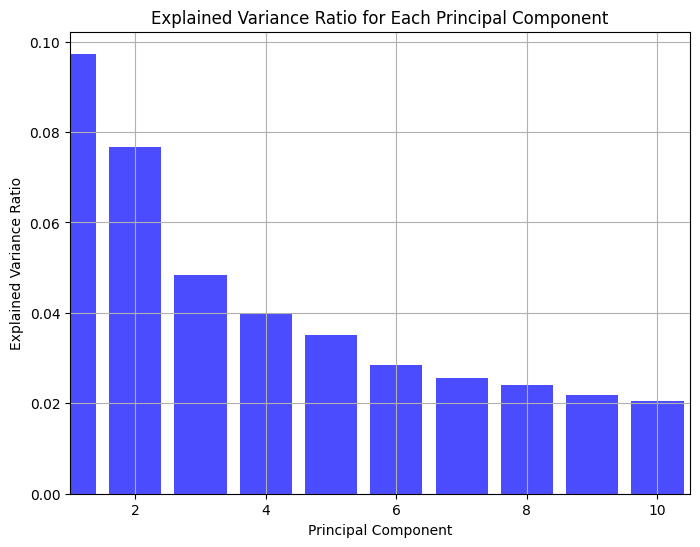

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ensure categorical columns are strings
df_gene_drop['source.location'] = df_gene_drop['source.location'].astype(str)
df_gene_drop['grade'] = df_gene_drop['grade'].astype(str)

# Define target and features and Split the data
y = df_gene_drop['cancer_types']
X = df_gene_drop.drop(columns=['cancer_types'])
numeric_features = X.drop(columns=['source.location', 'grade']).columns
categorical_features = ['source.location', 'grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#imputer by mean at numerical features
imp_num_model = SimpleImputer(strategy='mean')
X_train_num_imputed = imp_num_model.fit_transform(X_train[numeric_features])
X_test_num_imputed = imp_num_model.transform(X_test[numeric_features])

# Impute missing values for categorical features
imp_cat = SimpleImputer(strategy='most_frequent')
X_train_cat_imputed = imp_cat.fit_transform(X_train[categorical_features])
X_test_cat_imputed = imp_cat.transform(X_test[categorical_features])

# Scale numeric features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num_imputed)
X_test_num_scaled = scaler.transform(X_test_num_imputed)

# One-Hot Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse=False for easy concatenation
X_train_cat_encoded = encoder.fit_transform(X_train_cat_imputed)
X_test_cat_encoded = encoder.transform(X_test_cat_imputed)

# Combine numerical and categorical features
X_train_transformed = np.concatenate((X_train_num_scaled, X_train_cat_encoded), axis=1)
X_test_transformed = np.concatenate((X_test_num_scaled, X_test_cat_encoded), axis=1)

# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.grid()
plt.xlim([1, 10.5]) 
plt.show()
# Make a plot just want to see how are the first component going on, 
# then to decision take hoe many componentS to use


In [14]:
# # YOUR CODE HERE TO DEMONSTRATE THE USAGE OF THE PREPROCESSOR CLASS
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

class Preprocessor:
    def __init__(self, n_components=10):
        self.imp_num = SimpleImputer(strategy='mean')
        self.imp_cat = SimpleImputer(strategy='most_frequent')
        self.scaler = StandardScaler()
        self.encoder = OneHotEncoder(drop='first', sparse_output=False)
        self.pca = PCA(n_components=n_components)
        self.n_components = n_components

    def fit(self, X_train, categorical_features, numeric_features):
        # Fit numerical imputer and scaler
        X_train_num = X_train[numeric_features]
        X_train_cat = X_train[categorical_features]
        # Fit imputers and transformations
        self.imp_num.fit(X_train_num)
        self.imp_cat.fit(X_train_cat)
        X_train_num_imputed = self.imp_num.transform(X_train_num)
        X_train_cat_imputed = self.imp_cat.transform(X_train_cat)
        # Scale and encode
        self.scaler.fit(X_train_num_imputed)
        self.encoder.fit(X_train_cat_imputed)
        # Combine and fit PCA
        X_train_num_scaled = self.scaler.transform(X_train_num_imputed)
        X_train_cat_encoded = self.encoder.transform(X_train_cat_imputed)
        X_train_combined = np.concatenate((X_train_num_scaled, X_train_cat_encoded), axis=1)
        self.pca.fit(X_train_combined)

    def transform(self, X, categorical_features, numeric_features):
        # Apply transformations to data
        X_num = X[numeric_features]
        X_cat = X[categorical_features]
        X_num_imputed = self.imp_num.transform(X_num)
        X_cat_imputed = self.imp_cat.transform(X_cat)
        X_num_scaled = self.scaler.transform(X_num_imputed)
        X_cat_encoded = self.encoder.transform(X_cat_imputed)
        X_combined = np.concatenate((X_num_scaled, X_cat_encoded), axis=1)
        X_pca = self.pca.transform(X_combined)
        return X_pca

    def fit_transform(self, X_train, categorical_features, numeric_features):
        # Fit and transform in a single step
        self.fit(X_train, categorical_features, numeric_features)
        return self.transform(X_train, categorical_features, numeric_features)

    def plot_explained_variance(self):
        explained_variance = self.pca.explained_variance_ratio_
        plt.figure(figsize=(8, 6))
        plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b')
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Explained Variance Ratio for Each Principal Component')
        plt.grid()
        plt.xlim([1, self.n_components]) 
        plt.show()
         

<a name='03'></a>
# Part C. Model Evaluation

Evaluating the performance of a machine learning model goes beyond just looking at accuracy, as accuracy alone can be misleading, especially in cases where the dataset is imbalanced or where different types of errors have different consequences
- **Detecting Overfitting/Underfitting**: A learning curve can help you understand whether your model is overfitting (performing well on training data but poorly on validation data) or underfitting (performing poorly on both training and validation data)
- **ROC**: The ROC curve shows how well your model distinguishes between classes. It helps in selecting the optimal threshold for classification decisions, particularly when the cost of false positives and false negatives differs significantly. ROC curves are often used to compare models. 
- **Confusion matrix**: From the confusion matrix, you can derive other important metrics like precision, recall, F1-score, and specificity, which give a better understanding of how your model is performing across different classes


### <span style="background-color: lightyellow;">Evaluation Task</span>
- Review the documentation for `sklearn.metrics` and `learning_curve`.
- Select appropriate metrics for your dataset, including accuracy and indicators of overfitting or underfitting.
- Implement functions to compute and assess these metrics. It is allowed to use libraries.
- Add the evaluation functions as a Python module to your repository.
- Update the evaluation documentation to clearly explain your choices for the evaluation metrics and the rationale behind them.

See also: [Model evaluation video](https://video.hanze.nl/media/model-evaluation/0_gybpnhq7)


### So i am going to use RandomForestClassifier to  classify the data. Then use  the confusion matrix to evaluate the model. 

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model =  RandomForestClassifier(n_estimators=70, random_state=42)
#here I use 70 estimators , the train data just has 71 samples, it will cause overfitting.
model.fit(X_train_pca, y_train)
print('the train data results by classification_report')
print(classification_report(y_train, model.predict(X_train_pca)))

print('the test data results by classification_report')
print(classification_report(y_test, model.predict(X_test_pca)))

y_pred = model.predict(X_test_pca)
def evaluate_model(y_true, y_pred, classes=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)

evaluate_model(y_test, y_pred, classes=[0, 1, 2])


the train data results by classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00         8

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

the test data results by classification_report
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.78      0.88      0.82         8
           2       0.00      0.00      0.00         3

    accuracy                           0.78        18
   macro avg       0.52      0.62      0.57        18
weighted avg       0.65      0.78      0.71        18

Accuracy: 0.7777777777777778
Precision: 0.6481481481481483
Recall: 0.7777777777777778
F1 Score: 0.7062908496732025
Confusion Matrix:
 [[7 0 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

#### The RandomForestClassifier I applied is overfitting here. And there is no positive results at the other_type class, so I cannot do a ROC_curve  for three classes once. so I am going to convert this three-class setup into three binary classifications (likes with Class 0 as the positive class and Classes 1 and 2 as the negative class)


Binary Confusion Matrix for Adenocarcinoma (Class 0):
 [[9 2]
 [0 7]]
Binary Confusion Matrix for Squamous (Class 1):
 [[8 2]
 [1 7]]
Binary Confusion Matrix for Others (Class 2):
 [[15  0]
 [ 3  0]]


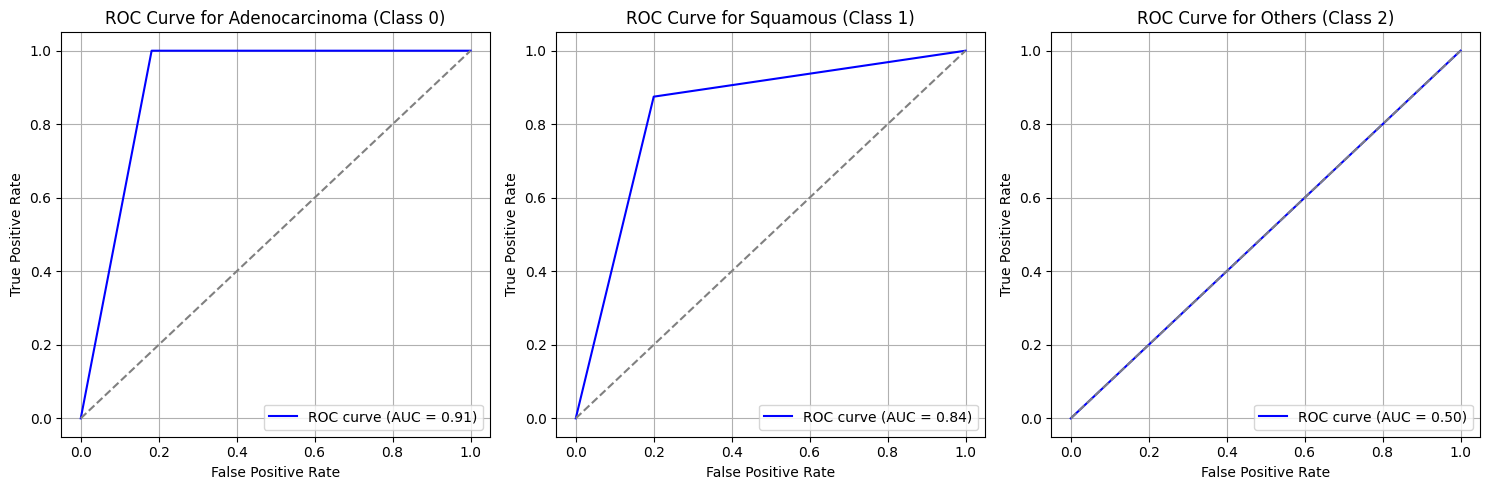

In [16]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

# labels in y is {'Adenocarcinoma': 0, 'Squamous': 1, 'others': 2}
labels = {0: 'Adenocarcinoma (Class 0)', 1: 'Squamous (Class 1)', 2: 'Others (Class 2)'}
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in zip(np.unique(y_test), axes):
    # Convert to binary classes (Class i = positive (1), other classes = negative (0))
    y_test_binary = [1 if label == i else 0 for label in y_test]
    y_pred_binary = [1 if label == i else 0 for label in y_pred]
    conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
    print(f"Binary Confusion Matrix for {labels[i]}:\n", conf_matrix)
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
    roc_auc = auc(fpr, tpr)
    # Plot ROC Curve on the subplot
    ax.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
    ax.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"ROC Curve for {labels[i]}")
    ax.legend(loc="lower right")
    ax.grid()
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Due to the unbalance data, the Accutacy is low. So I am going to upsample the train data.

In [17]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
print("Training data class distribution:")
for cls, count in zip(unique_train, counts_train):
    print(f"Class {cls}: {count} samples")

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=6)  # there are 8 others_type samples
X_resampled, y_resampled = smote.fit_resample(X_train_pca, y_train)

unique_train, counts_train = np.unique(y_resampled, return_counts=True)
print("\nTrain data class distribution after SMOTE upsample:")
for cls, count in zip(unique_train, counts_train):
    print(f"Class {cls}: {count} samples")


Training data class distribution:
Class 0: 35 samples
Class 1: 28 samples
Class 2: 8 samples

Train data class distribution after SMOTE upsample:
Class 0: 35 samples
Class 1: 35 samples
Class 2: 35 samples


In [18]:
model.fit(X_resampled, y_resampled)  # new train data that after upsampled
y_pred = model.predict(X_test_pca)  
y_prob = model.predict_proba(X_test_pca)

print('the train data results by classification_report')
print(classification_report(y_train, model.predict(X_train_pca)))

print('the test data results by classification_report')
print(classification_report(y_test, model.predict(X_test_pca)))

evaluate_model(y_test, y_pred, classes=[0, 1, 2])

the train data results by classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00         8

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

the test data results by classification_report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.80      1.00      0.89         8
           2       1.00      0.33      0.50         3

    accuracy                           0.83        18
   macro avg       0.89      0.73      0.75        18
weighted avg       0.86      0.83      0.81        18

Accuracy: 0.8333333333333334
Precision: 0.8555555555555556
Recall: 0.8333333333333334
F1 Score: 0.8117283950617283
Confusion Matrix:
 [[6 1 0]


### From the results, the accuracy increases. So upsampling helps us deal with the unbalcance data situation. So i am going to draw  ROC curve by 3 classes. At class 1 and class 2. they have been increased at accuracy and ROC curve.  But at class 0, the accuracy and ROC curve are same, because the numbers of sample did not change.

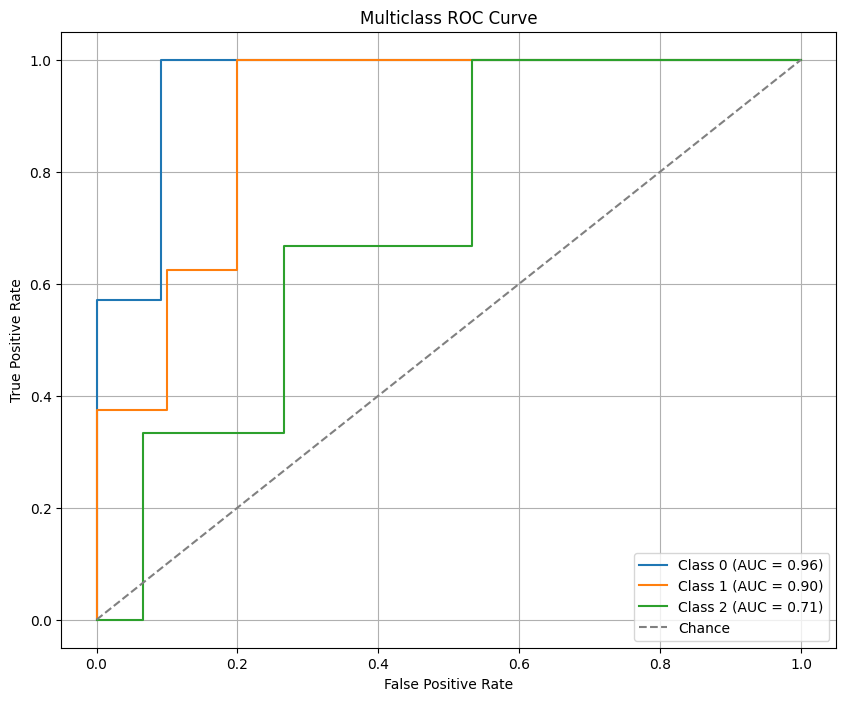

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=model.classes_)  # Adjust `classes` based on your model's unique classes
n_classes = y_test_bin.shape[1]

# Train OneVsRestClassifier on the training set and get the predicted probabilities
# Assuming `model` is a classifier that supports probabilities, like RandomForestClassifier
ovr_model = OneVsRestClassifier(model)
y_pred_proba = ovr_model.fit(X_train_pca, y_train).predict_proba(X_test_pca)

# Plot ROC for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {model.classes_[i]} (AUC = {roc_auc:.2f})")

# Plot reference line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Chance")

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

#### It looks better than the original data

### learing curve

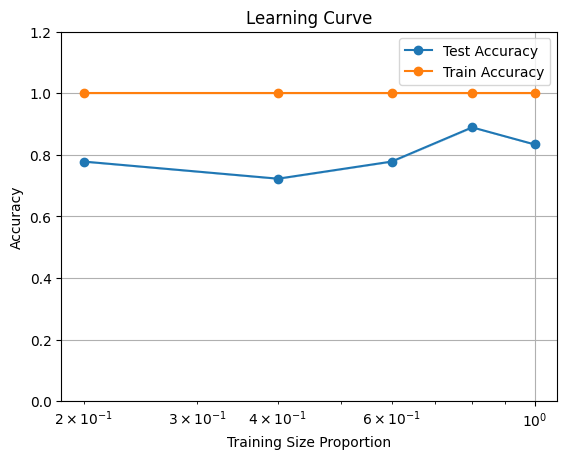

In [20]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

iterations = 10
datasizes = np.array([0.2, 0.4, 0.6, 0.8, 1])
metric_train, metric_test = np.empty((iterations, datasizes.size)), np.empty((iterations, datasizes.size))
for j, datasize in enumerate(datasizes):
    for i in range(iterations):
        X_train_partial = X_resampled[:int(datasize * len(X_resampled))]
        y_train_partial = y_resampled[:int(datasize * len(y_resampled))]
        model = model
        model.fit(X_train_partial, y_train_partial)
        metric_train[i, j] = accuracy_score(y_train_partial, model.predict(X_train_partial))
        metric_test[i, j] = accuracy_score(y_test, model.predict(X_test_pca))

plt.figure()
plt.plot(datasizes, metric_test.mean(axis=0), 'o-', label='Test Accuracy')
plt.plot(datasizes, metric_train.mean(axis=0), 'o-', label='Train Accuracy')
# Add fill between for standard deviation areas
plt.fill_between(datasizes, metric_test.mean(axis=0) - metric_test.std(axis=0), 
                 metric_test.mean(axis=0) + metric_test.std(axis=0), color='C0', alpha=0.2)
plt.fill_between(datasizes, metric_train.mean(axis=0) - metric_train.std(axis=0), 
                 metric_train.mean(axis=0) + metric_train.std(axis=0), color='C1', alpha=0.2)
plt.xscale('log')
plt.ylim((0, 1.2))
plt.xlabel('Training Size Proportion')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

#### Validation curve

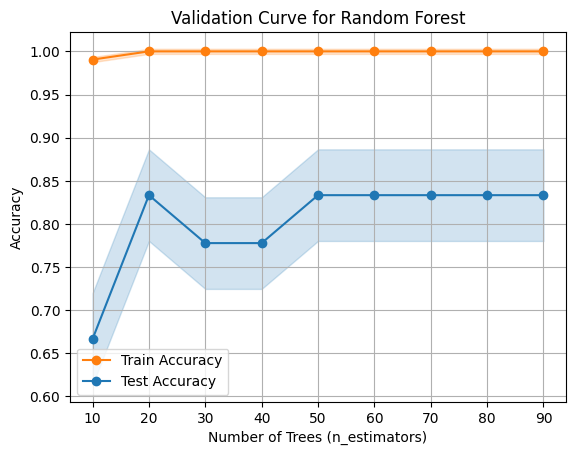

In [21]:
param_range = np.arange(10, 100, 10)  
metric_train, metric_test = np.empty(len(param_range)), np.empty(len(param_range))

for i, n_estimators in enumerate(param_range):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_resampled, y_resampled)  # Train on the entire resampled dataset
    
    # Calculate accuracy for both training and test sets
    metric_train[i] = accuracy_score(y_resampled, model.predict(X_resampled))
    metric_test[i] = accuracy_score(y_test, model.predict(X_test_pca))
plt.figure()
plt.plot(param_range, metric_train, 'o-', label='Train Accuracy', color='C1')
plt.plot(param_range, metric_test, 'o-', label='Test Accuracy', color='C0')
plt.fill_between(param_range, metric_train - metric_train.std(),
                 metric_train + metric_train.std(), color='C1', alpha=0.2)
plt.fill_between(param_range, metric_test - metric_test.std(),
                 metric_test + metric_test.std(), color='C0', alpha=0.2)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Validation Curve for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

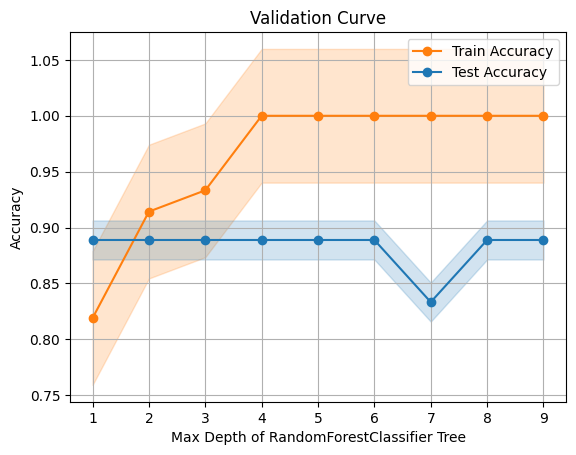

In [22]:
param_range = np.arange(1, 10)  
metric_train, metric_test = np.empty((len(param_range),)), np.empty((len(param_range),))

for i, max_depth in enumerate(param_range):
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_resampled, y_resampled) 
    metric_train[i] = accuracy_score(y_resampled, model.predict(X_resampled))
    metric_test[i] = accuracy_score(y_test, model.predict(X_test_pca))
plt.figure()
plt.plot(param_range, metric_train, 'o-', label='Train Accuracy', color='C1')
plt.plot(param_range, metric_test, 'o-', label='Test Accuracy', color='C0')
plt.fill_between(param_range, metric_train - metric_train.std(),
                 metric_train + metric_train.std(), color='C1', alpha=0.2)
plt.fill_between(param_range, metric_test - metric_test.std(),
                 metric_test + metric_test.std(), color='C0', alpha=0.2)

plt.xlabel('Max Depth of RandomForestClassifier Tree')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend()
plt.grid(True)
plt.show()

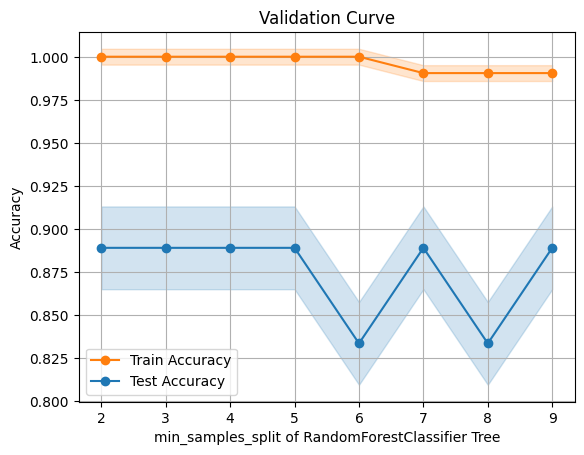

In [23]:
param_range = np.arange(2, 10)  
metric_train, metric_test = np.empty((len(param_range),)), np.empty((len(param_range),))

for i, min_sample in enumerate(param_range):
    model = RandomForestClassifier(min_samples_split=min_sample, random_state=42)
    model.fit(X_resampled, y_resampled) 
    metric_train[i] = accuracy_score(y_resampled, model.predict(X_resampled))
    metric_test[i] = accuracy_score(y_test, model.predict(X_test_pca))
plt.figure()
plt.plot(param_range, metric_train, 'o-', label='Train Accuracy', color='C1')
plt.plot(param_range, metric_test, 'o-', label='Test Accuracy', color='C0')
plt.fill_between(param_range, metric_train - metric_train.std(),
                 metric_train + metric_train.std(), color='C1', alpha=0.2)
plt.fill_between(param_range, metric_test - metric_test.std(),
                 metric_test + metric_test.std(), color='C0', alpha=0.2)

plt.xlabel('min_samples_split of RandomForestClassifier Tree')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend()
plt.grid(True)
plt.show()

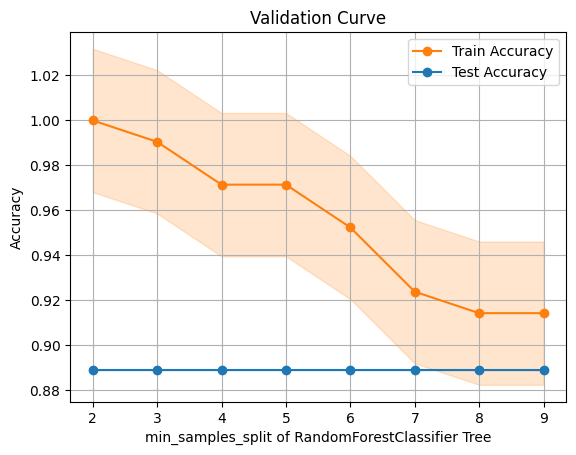

In [24]:
param_range = np.arange(2, 10)  
metric_train, metric_test = np.empty((len(param_range),)), np.empty((len(param_range),))

for i, min_leaf in enumerate(param_range):
    model = RandomForestClassifier(min_samples_leaf=min_leaf, random_state=42)
    model.fit(X_resampled, y_resampled) 
    metric_train[i] = accuracy_score(y_resampled, model.predict(X_resampled))
    metric_test[i] = accuracy_score(y_test, model.predict(X_test_pca))
plt.figure()
plt.plot(param_range, metric_train, 'o-', label='Train Accuracy', color='C1')
plt.plot(param_range, metric_test, 'o-', label='Test Accuracy', color='C0')
plt.fill_between(param_range, metric_train - metric_train.std(),
                 metric_train + metric_train.std(), color='C1', alpha=0.2)
plt.fill_between(param_range, metric_test - metric_test.std(),
                 metric_test + metric_test.std(), color='C0', alpha=0.2)

plt.xlabel('min_samples_split of RandomForestClassifier Tree')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend()
plt.grid(True)
plt.show()

### Explaination
Applying Rondomforest model, the accuracy of test data is increasing with the traing size proportion increasing at learning curve. But the  accuracy of training data always keeps on 100% . That is overfitting. And I drawed three validation curves to check the proformance at the different parameters in Randomforest. Summarise, the Randomforest model is overfitting at the data. The reasons might be the samples  are too few, the features are too many, or the model is too complex. 

 So I try to change the model to avoid overfitting. I try some different models to check the accuracy of the test data.The next are some ensemble model. And I can use some cross validation to find a best model with some parameters by pipeline.








## Part D. Ensemble learning
Ensemble learning is a powerful machine learning technique that combines the predictions of multiple models to improve overall performance, robustness, and accuracy. Rather than relying on a single model, ensemble learning methods aggregate the results of several models—often called "weak learners"—to produce a stronger predictive model. The key idea behind ensemble learning is that by combining models, the weaknesses of individual models can be offset, leading to better generalization on unseen data. Popular ensemble ML algorithms are the `Random Forest` and `XGBoost`. 
Here’s an improved version of the introduction:

### voting algorithms
Voting algorithms in ensemble learning combine the predictions of multiple classifiers to make a final decision, typically based on the consensus or weighted agreement among models. Two primary types of voting are commonly used: hard voting, where the final prediction is determined by the majority vote, and soft voting, which uses the weighted average of predicted probabilities to determine the outcome. Several sites explain the hard and soft voting algorithm. A clear explanation can be found on https://www.baeldung.com/cs/hard-vs-soft-voting-classifiers


### <span style="background-color: lightyellow;">Ensemble Task</span>
- Review the [Study Case notebook on ensemble learning](..Study_Cases/study_case_bagging_boosting.ipynb).
- Try three different algorithms for classification of your data label.
- Implement a hard and soft voting algorithm for model aggregation.
- Compare the performance of the voting algorithm with that of a boosting or bagging algorithm.
- Update your repository with the voting algorithm class

See also: [ensemle learning video](https://video.hanze.nl/media/Ensemble/0_sue5v33g)


In [25]:
# YOUR CODE HERE WITH THE VOTING ALGORITHMS
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

clfs = [LogisticRegression(),GaussianNB(),DecisionTreeClassifier(max_depth=3)]

class vote_soft():
    '''per class,average the probabilities assigned by all base_learner'''
    def __init__(self,base_learners):
        self.base_learners = base_learners
        self.classes = None

    def __repr__(self):
        return f'SoftVoting(base_learners={repr(self.base_learners)})'

    def fit(self, X, y):
        self.classes = np.unique(y)
        for base_learner in self.base_learners:
            base_learner.fit(X,y)
        return self
        
    def predict_proba(self, X):
        probas = np.zeros((X.shape[0],len(self.classes)))
        for  base_learner in self.base_learners:
            probas += base_learner.predict_proba(X)
        probas /= len(self.base_learners)
        return probas
    
    def predict(self, X):
        y_hat = self.classes[np.argmax(self.predict_proba(X),axis=1)]
        return y_hat


class vote_hard():
    ''' making final class predictions based on the majority vote of each base model’s discrete class labels'''
    def __init__(self, base_learners):
        self.base_learners = base_learners
        self.classes = None

    def __repr__(self):
        return f'HardVoting(base_learners={repr(self.base_learners)})'

    def fit(self, X, y):
        self.classes = np.unique(y)
        for base_learner in self.base_learners:
            base_learner.fit(X, y)
        return self

    def predict(self, X):
        """Aggregate predictions by majority voting (hard voting)."""
        predictions = np.array([base_learner.predict(X) for base_learner in self.base_learners])
        # Use mode to get the most common prediction per instance
        y_hat = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
        return y_hat

In [26]:
# YOUR CODE HERE TO COMPARE VOTING OUTCOME WITH A BAGGING OR BOOSTING ALGORITHM FROM SKLEARN
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

X_train, y_train = X_resampled,y_resampled
X_test = X_test_pca
models = {
    "Soft Voting": vote_soft(clfs),  
    "Hard Voting": vote_hard(clfs), 
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=30, random_state=42),
    "Boosting - Decision Tree": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=30, random_state=42),
    "Boosting - Logistic Regression": AdaBoostClassifier(estimator=LogisticRegression(max_iter=100), n_estimators=30, random_state=42),
    "Boosting - SVM": AdaBoostClassifier(estimator=SVC(kernel="poly", probability=True), n_estimators=30, random_state=42)
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
    }
    # Add ROC AUC if it's a binary classification
    if len(np.unique(y_test)) == 2 and hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        results['ROC AUC'] = roc_auc_score(y_test, y_prob)
    return results

# Evaluate each model
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

results_df = pd.DataFrame(results).T
print(results_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

                                Accuracy  F1 Score
Soft Voting                     0.722222  0.656790
Hard Voting                     0.722222  0.656790
Bagging                         0.888889  0.864597
Boosting - Decision Tree        0.833333  0.758025
Boosting - Logistic Regression  0.833333  0.818519
Boosting - SVM                  0.833333  0.758025


#### From the results, I can choose the best model for this data, which is Bagging with decision tree.  The model has a high accuracy of 0.89, F1 score is 0.86. So in the next I am going to check if it is overfitting.

In [30]:
X_train, y_train = X_resampled,y_resampled
X_test = X_test_pca

best_model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=30, random_state=42)
best_model.fit(X_train, y_train)
y_pred_trian = best_model.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_pred_trian,)
print(accuracy_score_train)

y_pred = best_model.predict(X_test)
accuracy_score_test = accuracy_score(y_test, y_pred,)
print(accuracy_score_test)

0.9809523809523809
0.8888888888888888


<a name='05'></a>
## Part E. Pipelines
The sklearn pipeline function is a tool in machine learning that simplifies the workflow by encapsulating all the steps involved in a single object. It offers advantages such as simplicity, reproducibility, efficiency, flexibility, and integration. The Pipeline is built using a list of (key, value) pairs, where the key is a string containing the name you want to give this step and value is an estimator object (the method to be executed).

### <span style="background-color: lightyellow;">Pipeline Task</span>
- Read the [Study Case notebook for a pipeline functions](..Study_Cases/study_case_pipeline.ipynb) to understand the principle of the pipeline function
- Implement a pipeline which prepares and classifies data 
- Use a `GridSearchCV` object with the `Pipeline` object and a parameter grid to optimize choose the best hyper parameters

### Here I use the cross-validation method to get the best parameters at the best model(bagging with decision tree)

In [37]:
# YOUR CODE HERE WITH THE PIPELINE IMPLEMENTATION
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X_train, y_train = X_resampled,y_resampled
X_test = X_test_pca
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.80, random_state=42)),
    ('classifier', BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=30, random_state=42))  
])
param_grid = {
    'classifier__n_estimators': [10, 30, 50],
    'classifier__estimator__max_depth': [None, 3, 5],
    'classifier__estimator__min_samples_split': [2, 3, 5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
# 5. Evaluation
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best Parameters from GridSearchCV:
{'classifier__estimator__max_depth': None, 'classifier__estimator__min_samples_split': 2, 'classifier__n_estimators': 30}


In [39]:
X_train, y_train = X_resampled,y_resampled
X_test = X_test_pca

best_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=None, min_samples_split=2), 
    n_estimators=30, 
    random_state=42
)

best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_pred_train)
print("Training accuracy:", accuracy_score_train)

# Testing accuracy
y_pred = best_model.predict(X_test)
accuracy_score_test = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy_score_test)

Training accuracy: 1.0
Testing accuracy: 0.8333333333333334


#### After optimiazing, we can get the following results: For my question and my feature engineering, Randomforest model is to complicated.  Baagging with decisiontree,under the some parameters that is 'classifier__estimator__max_depth': None, 'classifier__estimator__min_samples_split': 2, 'classifier__n_estimators': 30, is better than Randomforest. The accuracy is 0.98. The both model cause the overfitting. the reason might be that the data and my  feature engineering are not good enough.

## <span style="background-color: lightyellow;">Bring it all together</span>

By now, you've developed code snippets for model evaluation, optimization, and data improvement. Now, leverage these skills to build a classification model using the Clinical and Genetic Lung data. Make sure that you log your experiments. 

Once you're satisfied with the model, upload the relevant code to your repository and or refactor code with new insights. Furthermore, take a moment to reflect on its applicability and potential real-world impact. Update your evaluation document(s) with these findings in your repository. 

## Bonus: ML for operations

If we intend to deploy the model in a real-world application, it's more efficient to save and reuse the trained model rather than retraining it each time. 

- Read the blog: https://neptune.ai/blog/saving-trained-model-in-python
- Write three python files 
    1) a train_model python file 
    2) a use_model python file
    3) a retrain_model python file that adds new data to the original training data and updates the model
- Update your repository
